In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import Normalizer, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
#Get the data

In [3]:
df=pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# clean the data

In [6]:
df.isna().sum()
df.drop(columns=['date','yr_built','yr_renovated'],inplace=True)

In [7]:
# EDA

In [8]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

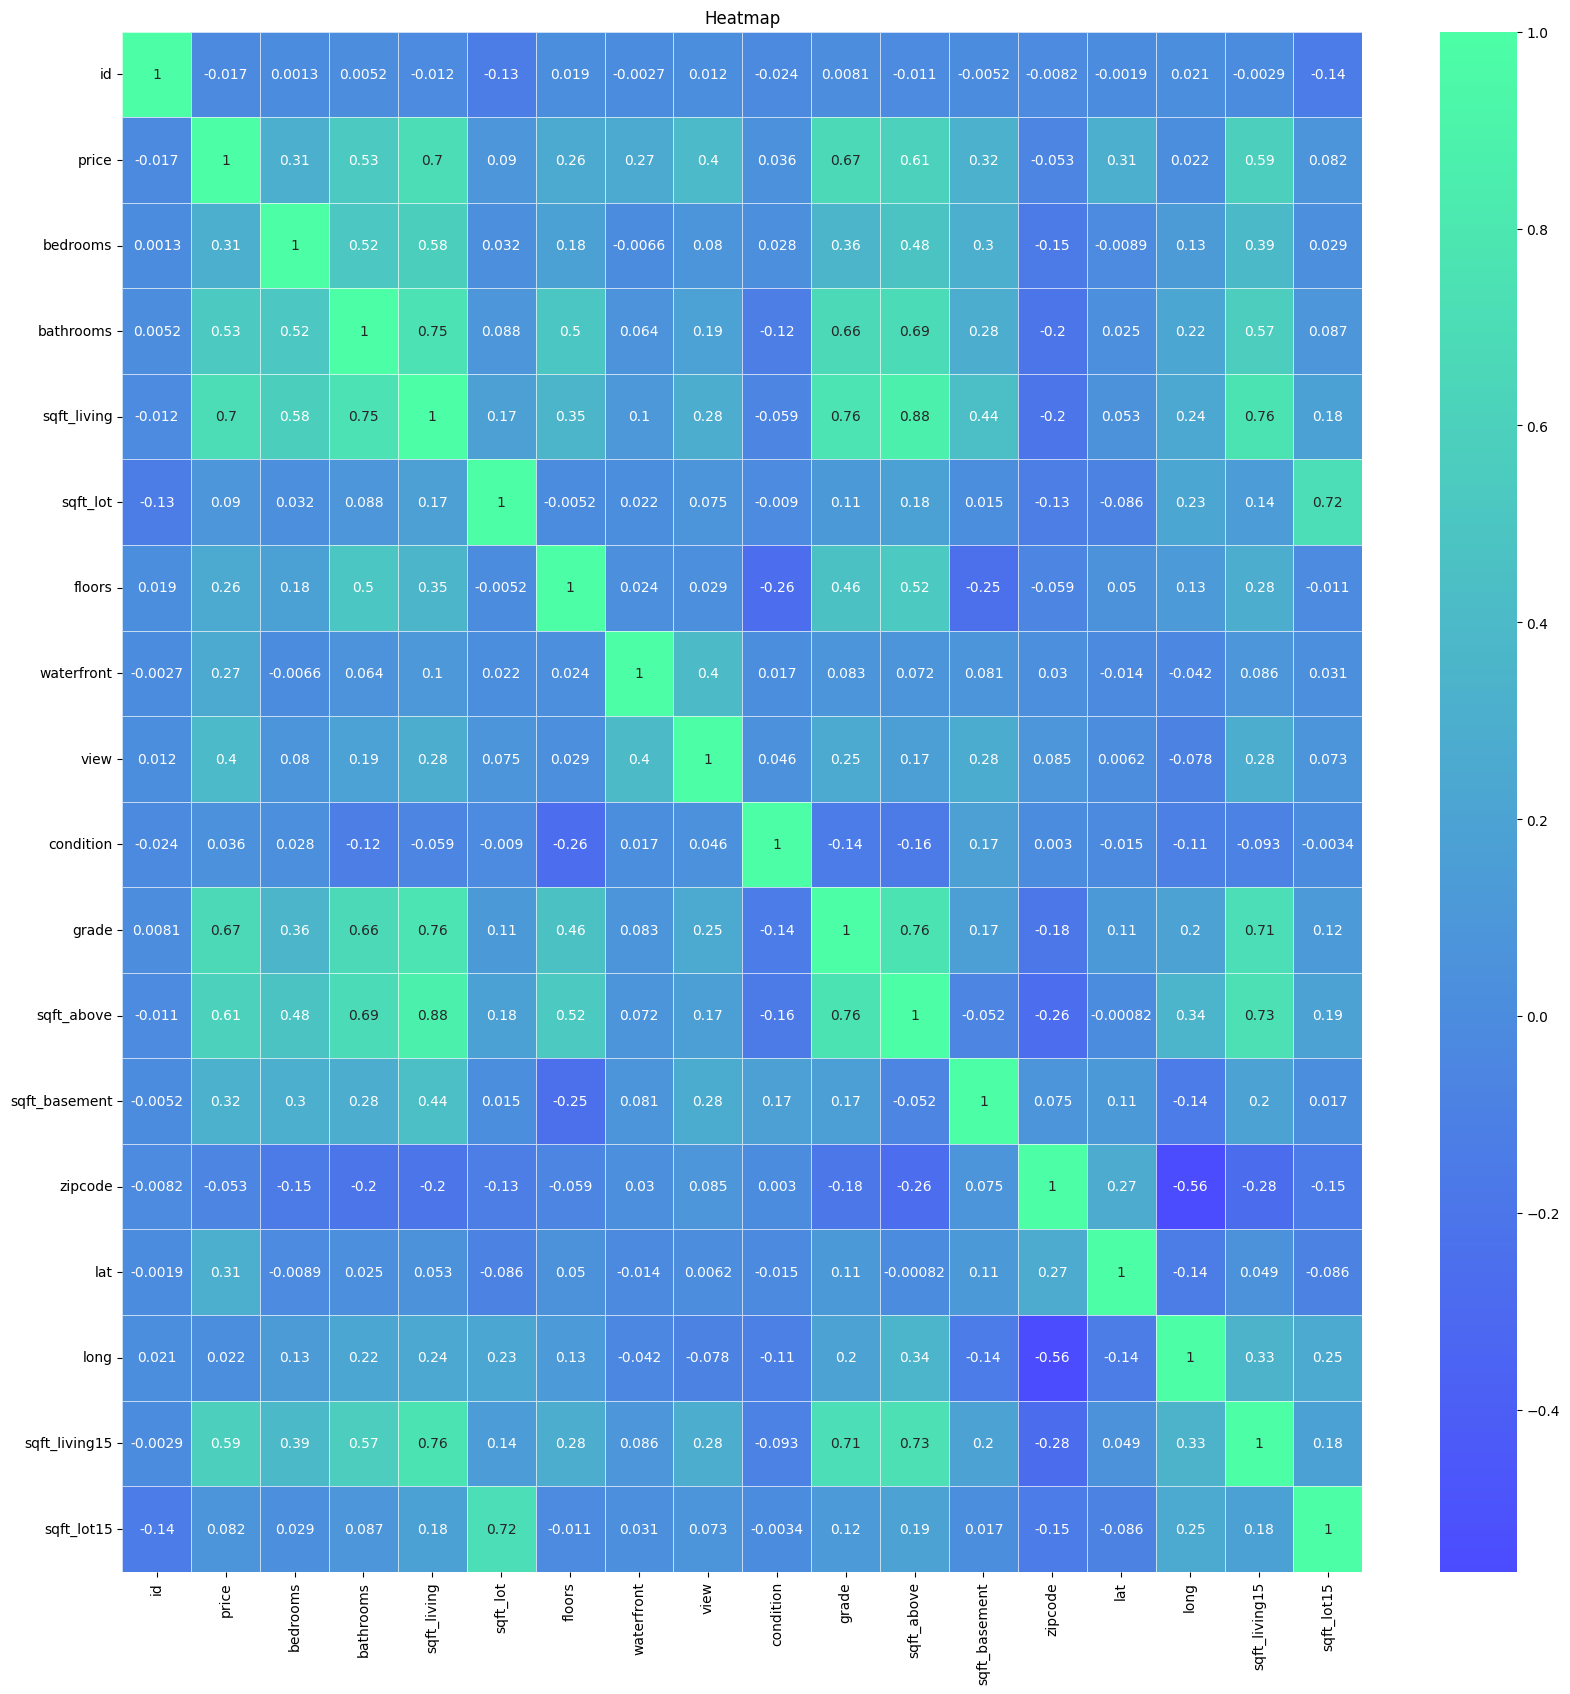

In [9]:
corr_matrix=df.corr()
print(corr_matrix)
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap='winter',linewidth=0.5,alpha=0.7)
plt.title('Heatmap')
plt.show()

In [10]:
X_train=df.copy()
X_test=df.copy()
y_train=X_train.pop('price')
y_test=X_test.pop('price')
df.describe().transpose()[['mean','std']]


,mean,std
id,4.580302e+09,2.876566e+09
price,5.400881e+05,3.671272e+05
bedrooms,3.370842e+00,9.300618e-01
bathrooms,2.114757e+00,7.701632e-01
sqft_living,2.079900e+03,9.184409e+02
sqft_lot,1.510697e+04,4.142051e+04
floors,1.494309e+00,5.399889e-01
waterfront,7.541757e-03,8.651720e-02
view,2.343034e-01,7.663176e-01
condition,3.409430e+00,6.507430e-01


In [11]:
#Normalization

In [12]:
feature_scaler=MinMaxScaler()
X_train_normalized=feature_scaler.fit_transform(X_train)
X_test_normalized=feature_scaler.transform(X_test)
label_scaler=MinMaxScaler()
y_train_normalized=label_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_normalized=label_scaler.transform(y_test.values.reshape(-1,1))
print(X_train_normalized)

[[0.72010308 0.09090909 0.125      ... 0.21760797 0.16193426 0.00574235]
 [0.64785332 0.09090909 0.28125    ... 0.16611296 0.22216486 0.00802712]
 [0.56879485 0.06060606 0.125      ... 0.23754153 0.3994149  0.00851302]
 ...
 [0.15378321 0.06060606 0.09375    ... 0.18272425 0.10686629 0.00155764]
 [0.0293272  0.09090909 0.3125     ... 0.37375415 0.17398038 0.00073057]
 [0.15378321 0.06060606 0.09375    ... 0.18272425 0.10686629 0.00081098]]


In [13]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(X_train_normalized.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(X_train_normalized,y_train_normalized,epochs=100,batch_size=32,validation_split=0.2)
loss=model.evaluate(X_test_normalized,y_test_normalized)
print(f'test_loss:{loss}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0012 - val_loss: 6.1282e-04
Epoch 2/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9373e-04 - val_loss: 5.1919e-04
Epoch 3/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8627e-04 - val_loss: 5.3549e-04
Epoch 4/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7310e-04 - val_loss: 4.8938e-04
Epoch 5/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4474e-04 - val_loss: 4.4736e-04
Epoch 6/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8594e-04 - val_loss: 4.3192e-04
Epoch 7/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5138e-04 - val_loss: 4.7469e-04
Epoch 8/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3752e-04 - val_loss: 3.9119e-04
Epoch 9/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2481e-04 - val_loss: 3.9294e-04
Epoch 10/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4639e-04 - val_loss: 3.9400e-04
Epoch 11/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2

In [14]:
predictions=model.predict(X_test_normalized)

mae = mean_absolute_error(y_test_normalized, predictions)
mse = mean_squared_error(y_test_normalized, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_normalized, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Absolute Error (MAE): 0.009279645994705571
Mean Squared Error (MSE): 0.00020442264878258443
Root Mean Squared Error (RMSE): 0.014297644868389494
R-squared (R²): 0.9118148036580332


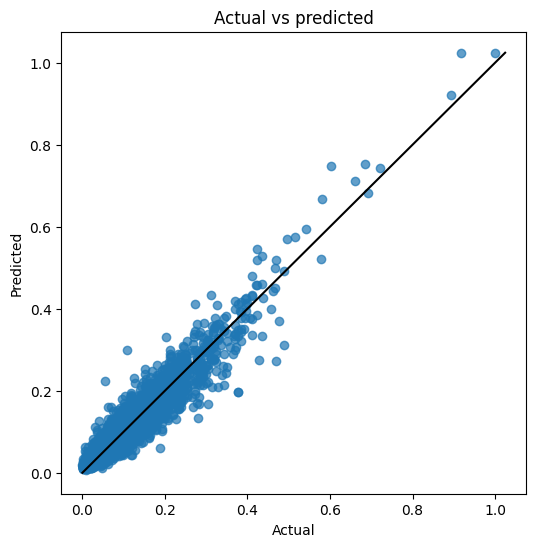

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_normalized,predictions,alpha=0.7)
plt.title('Actual vs predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

max_value=max(max(y_test_normalized),max(predictions))
min_value=min(min(y_test_normalized),min(predictions))
plt.plot([min_value,max_value],[min_value,max_value],color='black')
plt.show()